In [1]:
import doctest
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
from sklearn.neighbors import NearestNeighbors
#from geopy.distance import geodesic
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
import umap.umap_ as umap
#from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#from leidenalg import find_partition
#import networkx as nx

# two useful data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.cluster as cluster
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from kneed import KneeLocator
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.cluster import HDBSCAN
# setup plotting in a notebook in a reasonable way
%matplotlib inline
%config InlineBackend.figure_format='retina'

# default figure aesthetics I'll be using, 
# there are other choices, see seaborn docs
sns.set_style("white")
sns.set_context("notebook")

# Read in housing dataframe and drop duplicates

In [3]:
housing_data_df = pd.read_csv(r'clean_housing_data_with_crime_rates.csv')
# manipulating coordinates to be two separate variables + in separate columns for location purposes
housing_df_revised = housing_data_df[['Bedroom', 'Bathroom', 'Area', 'PPSq', 'LotArea', 'MarketEstimate', 'RentEstimate', 'ListedPrice', 'difference_listed_vs_estimate', 'house_coordinates', 'distance_to_maj_city_miles', 'violent_crime', 'prop_crime', 'larceny', 'vehicle_theft']]
housing_df_revised['x_house_coord'], housing_df_revised['y_house_coord'] = zip(*(housing_df_revised['house_coordinates'].str.strip('()').str.split(', ')))
housing_df_revised['x_house_coord'] = housing_df_revised['x_house_coord'].astype(float)
housing_df_revised['y_house_coord'] = housing_df_revised['y_house_coord'].astype(float)
housing_df_revised.drop(columns=['house_coordinates'], inplace=True)
housing_df_revised

C:\Users\krist\AppData\Local\Temp\ipykernel_40952\3365714120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_revised['x_house_coord'], housing_df_revised['y_house_coord'] = zip(*(housing_df_revised['house_coordinates'].str.strip('()').str.split(', ')))
C:\Users\krist\AppData\Local\Temp\ipykernel_40952\3365714120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_revised['x_house_coord'], housing_df_revised['y_house_coord'] = zip(*(housing_df_revised['house_coordinates'].str.strip(

,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,ListedPrice,difference_listed_vs_estimate,distance_to_maj_city_miles,violent_crime,prop_crime,larceny,vehicle_theft,x_house_coord,y_house_coord
0,3.0,2.0,1564.0,96.547315,0.2000,150500.0,1385.0,151000.0,500.0,87.664428,0.001893,0.027600,0.017277,0.002520,32.372746,-86.165115
1,3.0,2.0,2196.0,76.958106,0.6100,124700.0,1250.0,169000.0,44300.0,83.806091,0.001893,0.027600,0.017277,0.002520,32.395950,-86.269714
2,3.0,3.0,3693.0,54.156512,6.9000,188300.0,1201.0,200000.0,11700.0,91.920847,0.001893,0.027600,0.017277,0.002520,32.273514,-86.259340
3,3.0,2.0,1428.0,90.966387,0.2600,127500.0,1019.0,129900.0,2400.0,87.007986,0.001893,0.027600,0.017277,0.002520,32.337000,-86.299740
4,3.0,1.0,1050.0,65.714286,0.1600,66500.0,950.0,69000.0,2500.0,83.007626,0.001893,0.027600,0.017277,0.002520,32.403250,-86.285370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9631,5.0,3.0,3068.0,128.748370,0.2200,381000.0,2495.0,395000.0,14000.0,143.591563,0.001845,0.008133,0.007043,0.000168,41.494328,-109.452580
9632,2.0,2.0,2008.0,343.625498,4.6000,689900.0,1672.0,690000.0,100.0,223.247715,0.002351,0.024521,0.017467,0.002687,42.860570,-106.109310
9633,4.0,2.0,2022.0,157.270030,0.1828,311100.0,1895.0,318000.0,6900.0,226.191583,0.002351,0.024521,0.017467,0.002687,42.865060,-106.276430
9634,3.0,3.0,2300.0,143.434783,0.1739,329500.0,1614.0,329900.0,400.0,226.233434,0.002351,0.024521,0.017467,0.002687,42.865440,-106.277450


In [5]:
# drop duplicates
housing_df_revised = housing_df_revised.drop_duplicates()
housing_df_revised

,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,ListedPrice,difference_listed_vs_estimate,distance_to_maj_city_miles,violent_crime,prop_crime,larceny,vehicle_theft,x_house_coord,y_house_coord
0,3.0,2.0,1564.0,96.547315,0.2000,150500.0,1385.0,151000.0,500.0,87.664428,0.001893,0.027600,0.017277,0.002520,32.372746,-86.165115
1,3.0,2.0,2196.0,76.958106,0.6100,124700.0,1250.0,169000.0,44300.0,83.806091,0.001893,0.027600,0.017277,0.002520,32.395950,-86.269714
2,3.0,3.0,3693.0,54.156512,6.9000,188300.0,1201.0,200000.0,11700.0,91.920847,0.001893,0.027600,0.017277,0.002520,32.273514,-86.259340
3,3.0,2.0,1428.0,90.966387,0.2600,127500.0,1019.0,129900.0,2400.0,87.007986,0.001893,0.027600,0.017277,0.002520,32.337000,-86.299740
4,3.0,1.0,1050.0,65.714286,0.1600,66500.0,950.0,69000.0,2500.0,83.007626,0.001893,0.027600,0.017277,0.002520,32.403250,-86.285370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9631,5.0,3.0,3068.0,128.748370,0.2200,381000.0,2495.0,395000.0,14000.0,143.591563,0.001845,0.008133,0.007043,0.000168,41.494328,-109.452580
9632,2.0,2.0,2008.0,343.625498,4.6000,689900.0,1672.0,690000.0,100.0,223.247715,0.002351,0.024521,0.017467,0.002687,42.860570,-106.109310
9633,4.0,2.0,2022.0,157.270030,0.1828,311100.0,1895.0,318000.0,6900.0,226.191583,0.002351,0.024521,0.017467,0.002687,42.865060,-106.276430
9634,3.0,3.0,2300.0,143.434783,0.1739,329500.0,1614.0,329900.0,400.0,226.233434,0.002351,0.024521,0.017467,0.002687,42.865440,-106.277450


# Convert dataframe to matrix and standardize

In [6]:
#convert housing_df to matrix
housing_df_matrix = housing_df_revised.values

In [7]:
# scale the data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
housing_df_matrix_scaled = StandardScaler().fit_transform(housing_df_matrix)
housing_df_matrix_scaled

array([[-0.47907302, -0.43453763, -0.48499815, ...,  0.02024339,
        -1.16701028,  0.60707476],
       [-0.47907302, -0.43453763,  0.06104029, ...,  0.02024339,
        -1.16342977,  0.60102099],
       [-0.47907302,  0.52731384,  1.35442565, ...,  0.02024339,
        -1.18232238,  0.60162139],
       ...,
       [ 0.55619049, -0.43453763, -0.08929308, ...,  0.1025285 ,
         0.45201709, -0.55688741],
       [-0.47907302,  0.52731384,  0.15089472, ...,  0.1025285 ,
         0.45207573, -0.55694644],
       [ 0.55619049, -0.43453763, -0.00462256, ...,  0.0182007 ,
         0.44984848, -0.56356514]])

# Dimension reduction using PCA

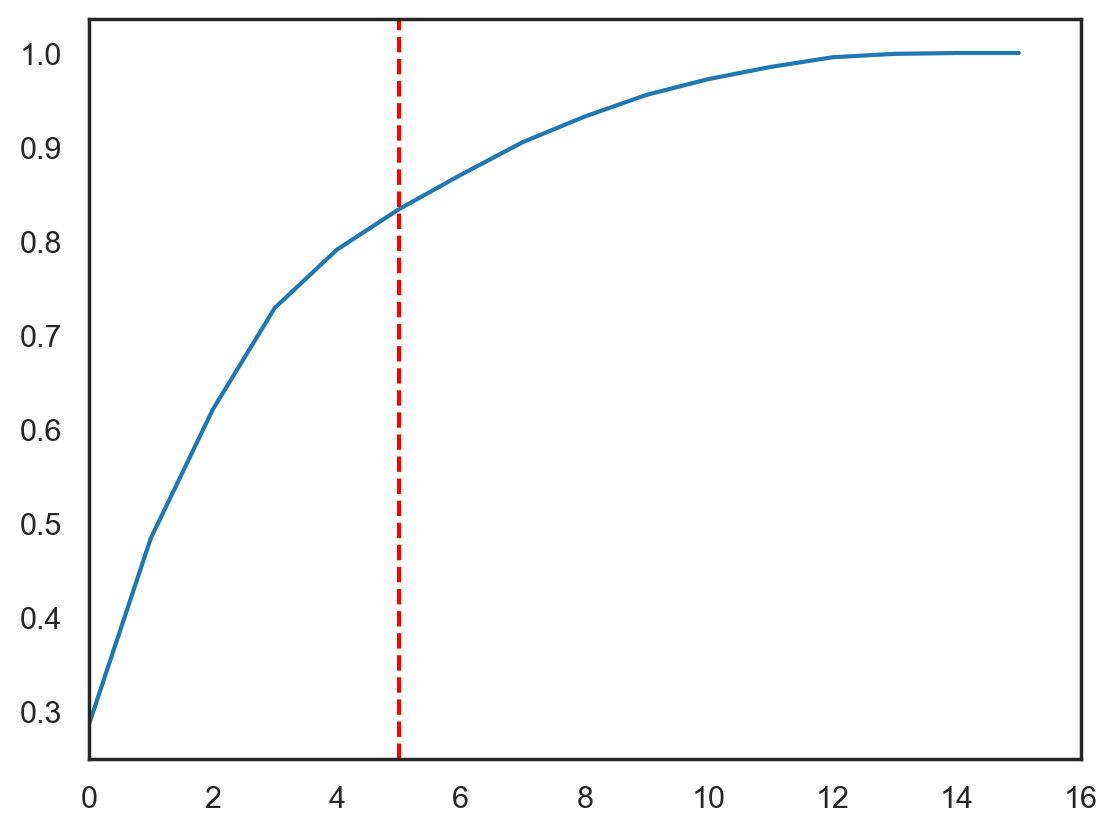

In [8]:
# find elbow point for optimal number of dimensions
dimred = PCA()
dimred.fit(housing_df_matrix_scaled)
sns.lineplot(np.cumsum(dimred.explained_variance_ratio_))
location = KneeLocator(range(1, len(dimred.explained_variance_ratio_) + 1),
                       np.cumsum(dimred.explained_variance_ratio_),
                       curve="concave", direction="increasing")
plt.axvline(location.elbow, color="red", linestyle="--")
plt.xlim((0,16));

In [9]:
# reduce down to 5 dimensions
dimred = PCA(n_components=5)
X = dimred.fit_transform(housing_df_matrix_scaled)

In [13]:
umap_model = umap.UMAP(n_neighbors=7, min_dist=0.1, metric='euclidean', random_state = 99, init = 'spectral')
umap_result = umap_model.fit_transform(X)

C:\Users\krist\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


# Gaussian mixture model (GMM)

### Find hyperparameters

In [10]:
# calculate the silhouette scores with different number of clusters
range_n_clusters = [2 ,3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters)
    clusterer.fit(X)
    cluster_labels = clusterer.predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.3479993317466068
For n_clusters = 3 The average silhouette_score is : 0.3045012277573022
For n_clusters = 4 The average silhouette_score is : 0.20028790167503918
For n_clusters = 5 The average silhouette_score is : 0.10409076538943578
For n_clusters = 6 The average silhouette_score is : 0.11025176981189533
For n_clusters = 7 The average silhouette_score is : 0.09211586836319659
For n_clusters = 8 The average silhouette_score is : 0.10573483912551093
For n_clusters = 9 The average silhouette_score is : 0.09080389202153982
For n_clusters = 10 The average silhouette_score is : 0.06628625129530515


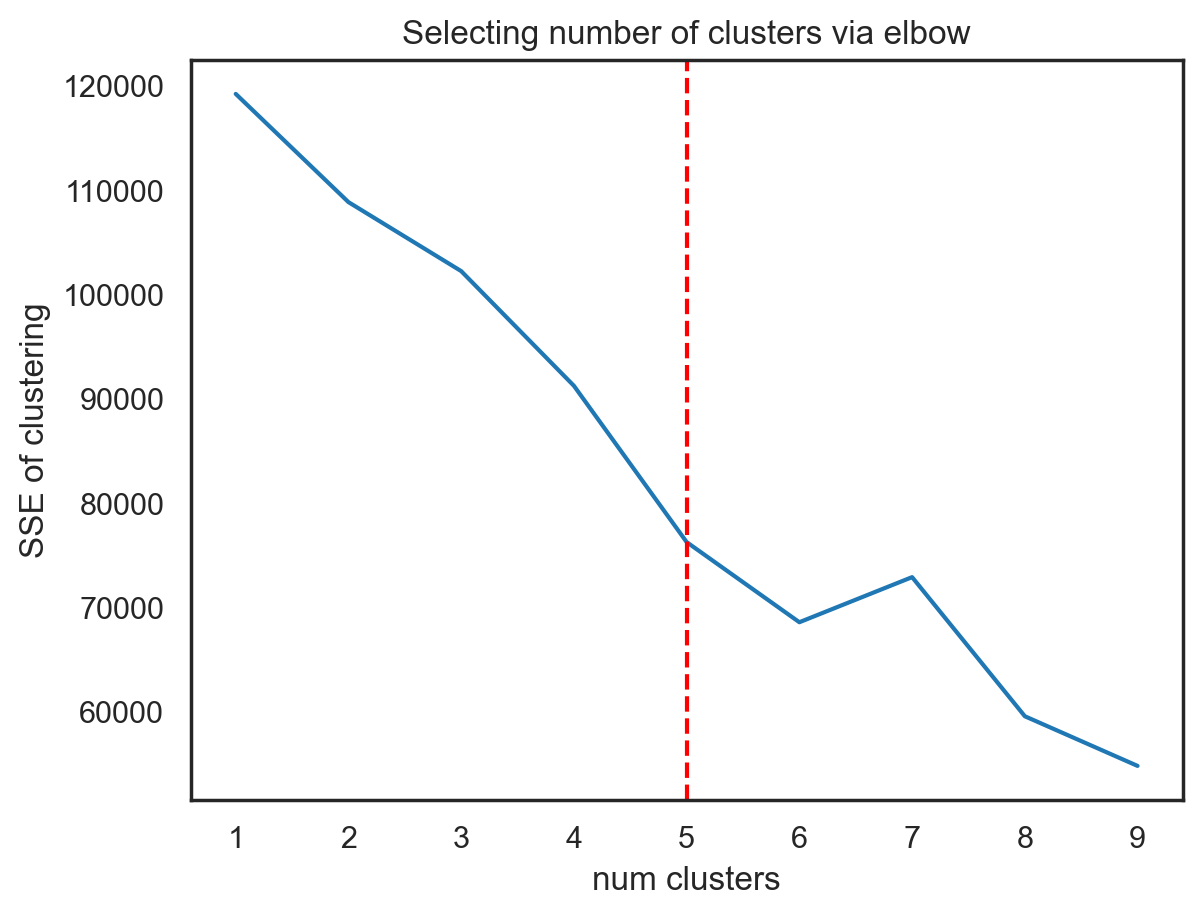

In [11]:
# generate elbow plot for optimal number of clusters
sse=[]
maxk = 10
for k in range(1,maxk):
    clust = GaussianMixture(n_components=k)
    clust.fit(X)
    
    distances = []
    for i, center in enumerate(clust.means_):
        distances.append(np.sum((X[clust.predict(X) == i] - center) ** 2))
    
    # Sum the squared distances to get the SSE
    sse.append(np.sum(distances)) 

# finds the location of max curvature (max of double derivative)
location = KneeLocator(range(1,maxk), sse, S=1.0, curve="convex", direction="decreasing")

plt.plot(range(1,maxk),sse)
plt.axvline(location.elbow, color="red", linestyle="--")

plt.xlabel('num clusters')
plt.ylabel('SSE of clustering')
plt.title('Selecting number of clusters via elbow');

### Generate clusters

In [12]:
# try 3 clusters
# note: inconsistencies between silhoutte scores and elbow point
# elbow point consistently changed each time it ran
# silhouette scores remained roughly the same across multiple runs
clusterer_gmm = GaussianMixture(n_components=3)
clusterer_gmm.fit(X)
cluster_labels_gmm = clusterer_gmm.predict(X)

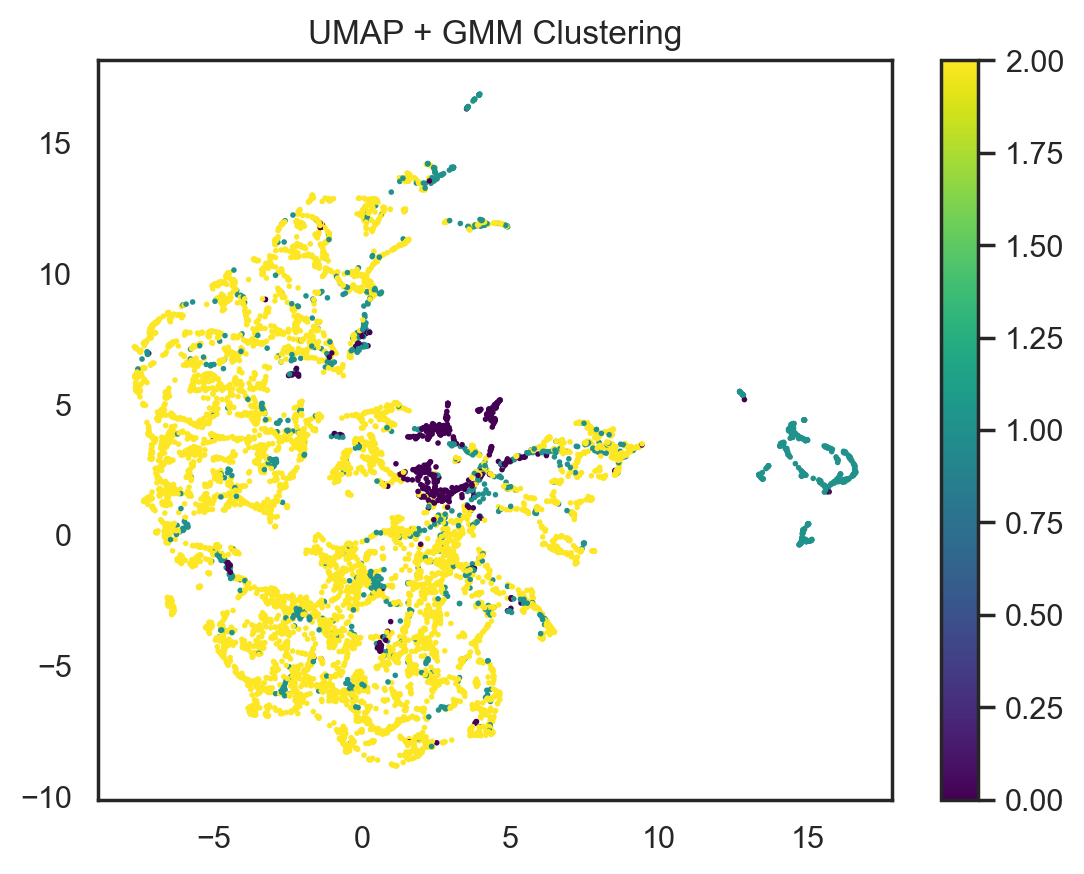

In [14]:
# generate umap with GMM clusters
# note: visualiztion of 6 dimensional data down to 2 dimensions may not show clearly defined clusters
# however, we must look at the actual data to see if it makes sense
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=cluster_labels_gmm, cmap='viridis', s = 1)
plt.title('UMAP + GMM Clustering')
plt.colorbar()
plt.show()

### Evaluate clusters

In [15]:
# add column to housing_df_revised with gmm cluster label for each point
housing_df_revised['gmm clusters'] = cluster_labels_gmm
# run groupby function by 'gmm clusters' to see mean of each cluster
housing_df_revised.groupby('gmm clusters').mean()

C:\Users\krist\AppData\Local\Temp\ipykernel_40952\1293988742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_revised['gmm clusters'] = cluster_labels_gmm


,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,ListedPrice,difference_listed_vs_estimate,distance_to_maj_city_miles,violent_crime,prop_crime,larceny,vehicle_theft,x_house_coord,y_house_coord
gmm clusters,,,,,,,,,,,,,,,,
0,4.003565,3.622103,3662.536542,532.389038,9.976450,1.885108e+06,7518.636364,1.984486e+06,99378.360071,111.019472,0.003366,0.023946,0.018168,0.002116,39.110771,-101.037568
1,3.587678,2.717852,2571.424961,206.126150,2.137179,4.924046e+05,2721.307267,5.010022e+05,8597.575829,509.957429,0.005654,0.037981,0.029234,0.003140,46.555774,-110.638680
2,3.402001,2.321008,1937.500856,190.019156,0.314971,3.508937e+05,2154.025800,3.535625e+05,2668.796235,84.167359,0.004141,0.026157,0.019547,0.002395,38.893423,-94.000256


In [16]:
# check how many points are in each cluster
for i in housing_df_revised['gmm clusters'].unique():
    shape = housing_df_revised[housing_df_revised['gmm clusters'] == i].shape[0]
    print (f'Cluster {i} has {shape} observations')

Cluster 2 has 7597 observations
Cluster 1 has 1266 observations
Cluster 0 has 561 observations


- Observations
    - Difference in cluster sizes is not optimal
    - We can clearly see a relationship differenting between the clusters however

# K-means

### Find hyperparameters

In [17]:
# calculate silhouette scores
range_n_clusters = [2,3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.30306328453329084


C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.3197285907608193


C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.31854066165250977


C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.32049231176349624


C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.28701753912975225


C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.2447912182399895


C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : 0.24673361791486478


C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.24237180790916182


C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10 The average silhouette_score is : 0.24356926982730892


C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

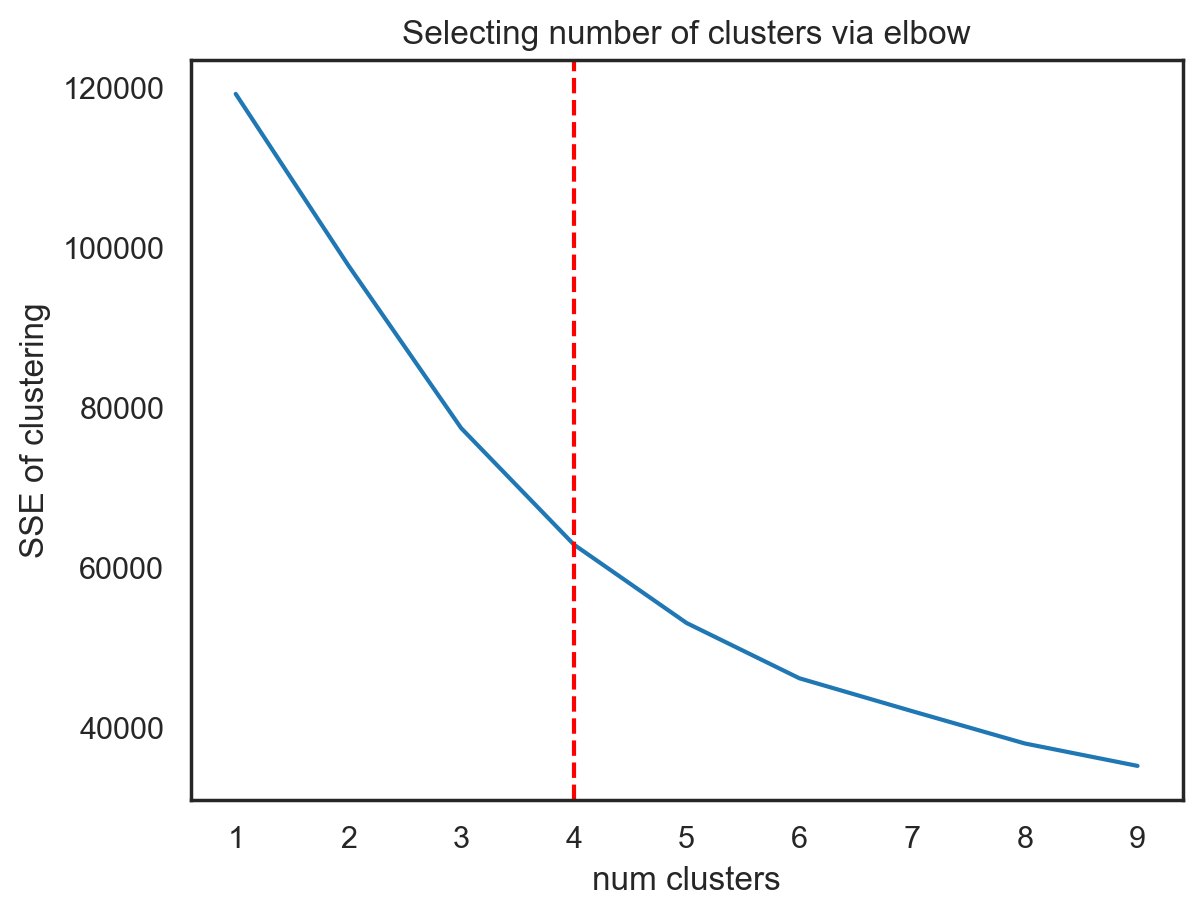

In [18]:
# plot the elbow point
sse=[]
maxk = 10
for k in range(1,maxk):
    clust = cluster.KMeans(n_clusters=k)
    clust.fit(X)
    sse.append(clust.inertia_)

# finds the location of max curvature (max of double derivative)
location = KneeLocator(range(1,maxk), sse, S=1.0, curve="convex", direction="decreasing")

plt.plot(range(1,maxk),sse)
plt.axvline(location.elbow, color="red", linestyle="--")

plt.xlabel('num clusters')
plt.ylabel('SSE of clustering')
plt.title('Selecting number of clusters via elbow');

### Generate clusters

C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


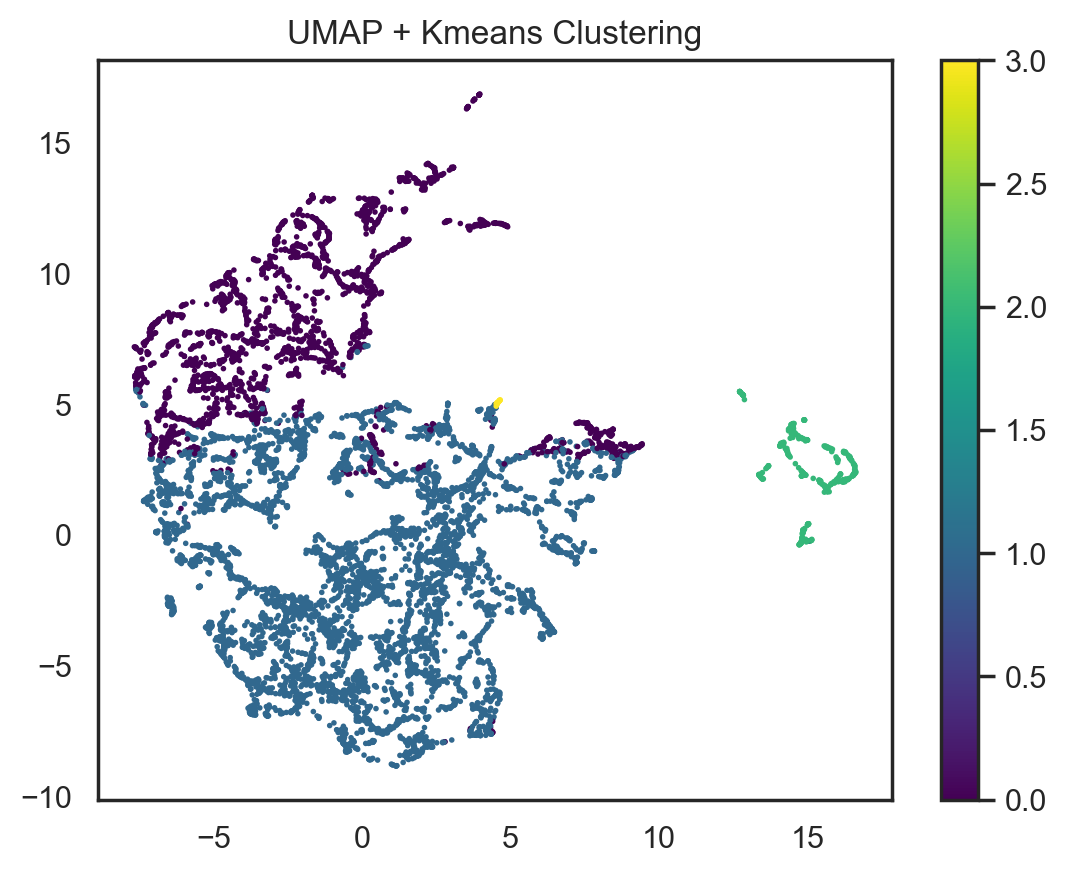

In [19]:
# try 4 clusters
# note: though 2 clusters has the highest silhouette score, our model does not make sense with 2 clusters
# we chose to use elbow point as the number of clusters
# elbow point of 4 has also relativly high silhouette score with score of 0.317
clusterer_kmeans = cluster.KMeans(n_clusters=4, random_state=10)
cluster_labels_kmeans = clusterer_kmeans.fit_predict(X)
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=cluster_labels_kmeans, cmap='viridis', s = 1)
plt.title('UMAP + Kmeans Clustering')
plt.colorbar()
plt.show()

### Evaluate clusters

In [20]:
# add column to housing_df_revised with kmeans cluster label for each point
housing_df_revised['kmeans clusters'] = cluster_labels_kmeans
# run groupby function by 'kmeans clusters' to see mean of each cluster
housing_df_revised.groupby('kmeans clusters').mean()

C:\Users\krist\AppData\Local\Temp\ipykernel_40952\2394154182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_revised['kmeans clusters'] = cluster_labels_kmeans


,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,ListedPrice,difference_listed_vs_estimate,distance_to_maj_city_miles,violent_crime,prop_crime,larceny,vehicle_theft,x_house_coord,y_house_coord,gmm clusters
kmeans clusters,,,,,,,,,,,,,,,,,
0,3.338983,2.317244,1947.867354,182.457848,0.697841,3.392320e+05,2126.008475,3.446938e+05,5.461740e+03,80.300827,0.007828,0.046167,0.033801,0.004568,37.795303,-93.484638,1.812454
1,3.519867,2.496676,2182.826658,219.668056,1.285020,4.747556e+05,2575.675479,4.808974e+05,6.141783e+03,94.627020,0.002592,0.018828,0.014534,0.001485,39.553774,-94.938267,1.767928
2,3.310345,2.448276,2108.625995,233.399305,1.371973,4.674456e+05,2653.021220,4.778091e+05,1.036347e+04,1407.865912,0.007542,0.041806,0.031727,0.004132,61.789083,-147.997361,0.989390
3,5.500000,7.625000,9932.562500,2023.515193,10.415739,1.567095e+07,61659.125000,1.750738e+07,1.836425e+06,52.916916,0.002565,0.015038,0.011893,0.001305,38.872737,-102.077512,0.000000


In [21]:
# check how many points are in each cluster
for i in housing_df_revised['kmeans clusters'].unique():
    shape = housing_df_revised[housing_df_revised['kmeans clusters'] == i].shape[0]
    print (f'Cluster {i} has {shape} observations')

Cluster 1 has 6317 observations
Cluster 0 has 2714 observations
Cluster 2 has 377 observations
Cluster 3 has 16 observations


- Observations
    - Cluster 0 and 3 have decent cluster sizes
    - however cluster size drastically drops off for clusters 1 and 2
    - looking at the means of each cluster however, there is clear distinguished difference between clusters

# DBSCAN

### Find hyperparameters

eps: 0.5, min_samples: 15
number of cluster : 8
number of noise : 2844
eps: 0.5, min_samples: 20
number of cluster : 7
number of noise : 3409
eps: 0.5, min_samples: 25
number of cluster : 7
number of noise : 3934
eps: 0.75, min_samples: 15
number of cluster : 5
number of noise : 1218
eps: 0.75, min_samples: 20
number of cluster : 4
number of noise : 1394
eps: 0.75, min_samples: 25
number of cluster : 2
number of noise : 1522
eps: 1, min_samples: 15
number of cluster : 4
number of noise : 619
eps: 1, min_samples: 20
number of cluster : 3
number of noise : 708
eps: 1, min_samples: 25
number of cluster : 2
number of noise : 792


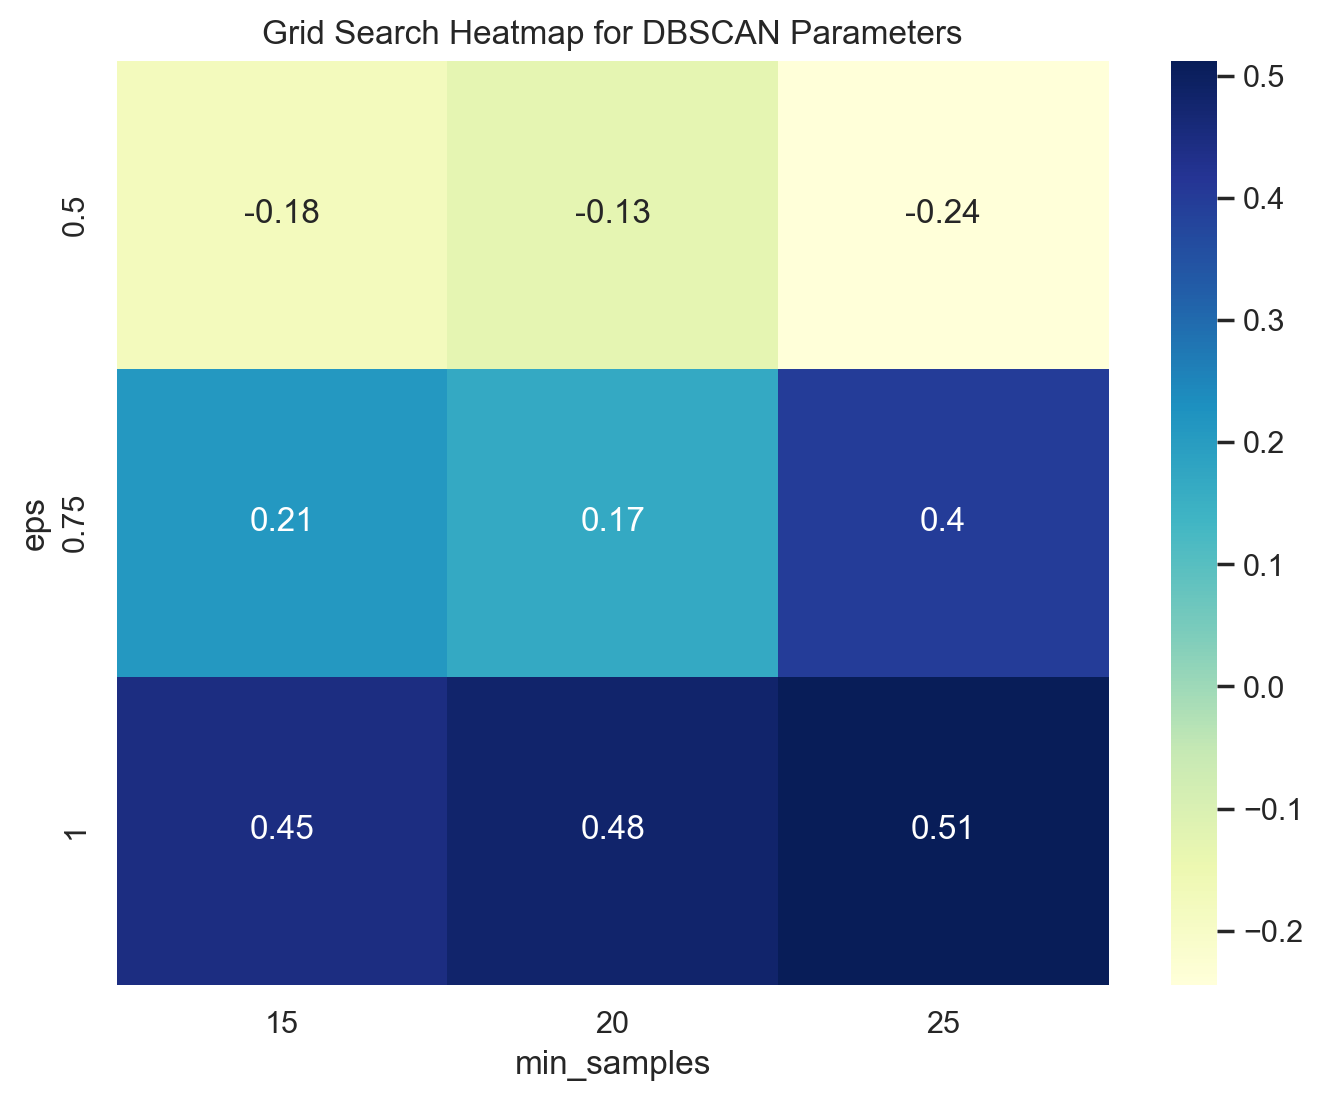

In [27]:
# decide parameters using gridsearch
# Define parameter grid
param_grid = {'eps': [0.5,0.75,1],
              'min_samples': [15,20,25]}

# Initialize arrays to store silhouette scores
silhouette_scores = np.zeros((len(param_grid['eps']), len(param_grid['min_samples'])))

# Iterate over parameter combinations
for i, params in enumerate(ParameterGrid(param_grid)):
    # Fit DBSCAN with current parameter combination
    dbscan = DBSCAN(**params)
    dbscan.fit(X)
    labels = dbscan.fit_predict(X)
    n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    eps_value = params['eps']
    min_samples_value = params['min_samples']
    
    print(f"eps: {eps_value}, min_samples: {min_samples_value}")
    print (f'number of cluster : {n_clusters_}')
    print (f'number of noise : {n_noise_}') 
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(X, dbscan.labels_)
    silhouette_scores[i // len(param_grid['min_samples']), i % len(param_grid['min_samples'])] = silhouette_avg

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(silhouette_scores, annot=True, cmap="YlGnBu", xticklabels=param_grid['min_samples'], yticklabels=param_grid['eps'])
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.title('Grid Search Heatmap for DBSCAN Parameters')
plt.show()

### Generate clusters

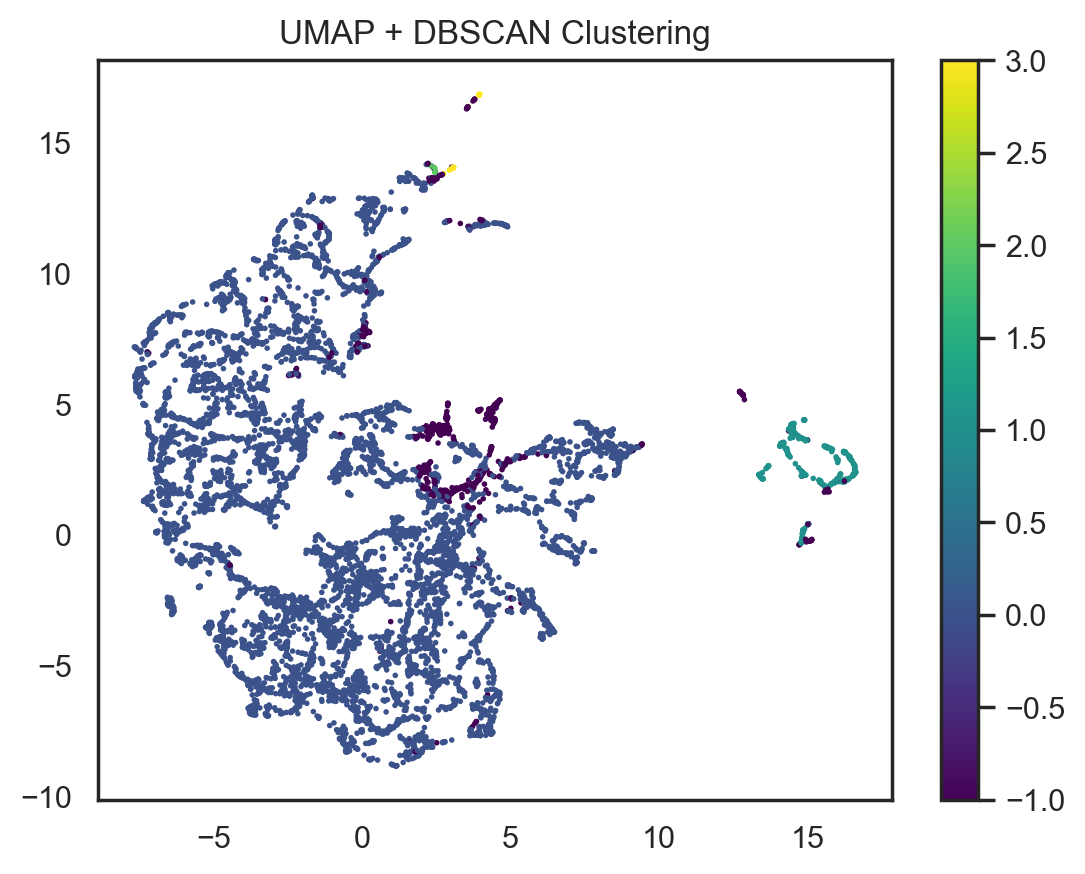

In [37]:
# try eps 1, min_samples 15
# should generate 4 clusters with silhouette score 0.45 and noise 619
dbscan = DBSCAN(eps=1, min_samples=15)
cluster_labels_dbscan = dbscan.fit_predict(X)
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=cluster_labels_dbscan, cmap='viridis', s = 1)
plt.title('UMAP + DBSCAN Clustering')
plt.colorbar()
plt.show()

### Evaluate clusters

In [38]:
# add column to housing_df_revised with gmm cluster label for each point
housing_df_revised['dbscan clusters'] = cluster_labels_dbscan
# run groupby function by 'gmm clusters' to see mean of each cluster
housing_df_revised.groupby('dbscan clusters').mean()

C:\Users\krist\AppData\Local\Temp\ipykernel_40952\2287666521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_revised['dbscan clusters'] = cluster_labels_dbscan


,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,ListedPrice,difference_listed_vs_estimate,distance_to_maj_city_miles,violent_crime,prop_crime,larceny,vehicle_theft,x_house_coord,y_house_coord,gmm clusters,kmeans clusters,hdbscan clusters
dbscan clusters,,,,,,,,,,,,,,,,,,,
-1,4.122779,3.773829,3834.862682,457.949540,8.554333,1.704216e+06,6976.369952,1.799122e+06,94906.399031,224.478649,0.004807,0.032608,0.024892,0.002774,41.538469,-103.405884,0.360258,0.901454,-0.379645
0,3.425477,2.362081,2009.665207,194.446345,0.601447,3.730322e+05,2228.687108,3.761017e+05,3069.533207,88.230243,0.004075,0.026335,0.019763,0.002362,39.004012,-94.269234,1.878655,0.702380,0.000000
1,3.219745,2.315287,1948.503185,223.153044,0.963775,4.142309e+05,2571.687898,4.207756e+05,6544.678344,1461.759397,0.007733,0.042669,0.032173,0.004328,62.226340,-149.280725,1.000000,2.000000,2.000000
2,3.062500,1.937500,1479.625000,157.865684,0.612187,2.293188e+05,1443.875000,2.342625e+05,4943.750000,128.322576,0.013165,0.081289,0.060707,0.009495,36.744650,-91.468440,1.625000,0.000000,0.000000
3,3.071429,2.107143,1584.821429,165.947887,0.261439,2.506643e+05,1877.107143,2.542750e+05,3610.678571,72.453444,0.016854,0.103547,0.081496,0.006365,37.424969,-79.731409,1.000000,0.000000,0.000000


In [39]:
# check how many points are in each cluster
for i in housing_df_revised['dbscan clusters'].unique():
    shape = housing_df_revised[housing_df_revised['dbscan clusters'] == i].shape[0]
    print (f'Cluster {i} has {shape} observations')

Cluster 0 has 8447 observations
Cluster 1 has 314 observations
Cluster -1 has 619 observations
Cluster 2 has 16 observations
Cluster 3 has 28 observations


- Observations
    - there is still a distinguishable relationship between clusters
    - however we see the expensive homes be classified as outliers, which is not ideal at all
    - the cluster sizes has a rather exponential decrease in size, which is also not very optimal

# HDBSCAN

min cluster size: 8, min_samples: 8
number of cluster : 7
number of noise : 403
min cluster size: 8, min_samples: 9
number of cluster : 3
number of noise : 287
min cluster size: 8, min_samples: 10
number of cluster : 3
number of noise : 294
min cluster size: 8, min_samples: 11
number of cluster : 6
number of noise : 1542
min cluster size: 8, min_samples: 12
number of cluster : 3
number of noise : 324
min cluster size: 9, min_samples: 8
number of cluster : 7
number of noise : 403
min cluster size: 9, min_samples: 9
number of cluster : 3
number of noise : 287
min cluster size: 9, min_samples: 10
number of cluster : 3
number of noise : 294
min cluster size: 9, min_samples: 11
number of cluster : 6
number of noise : 1542
min cluster size: 9, min_samples: 12
number of cluster : 3
number of noise : 324
min cluster size: 10, min_samples: 8
number of cluster : 7
number of noise : 403
min cluster size: 10, min_samples: 9
number of cluster : 3
number of noise : 287
min cluster size: 10, min_samp

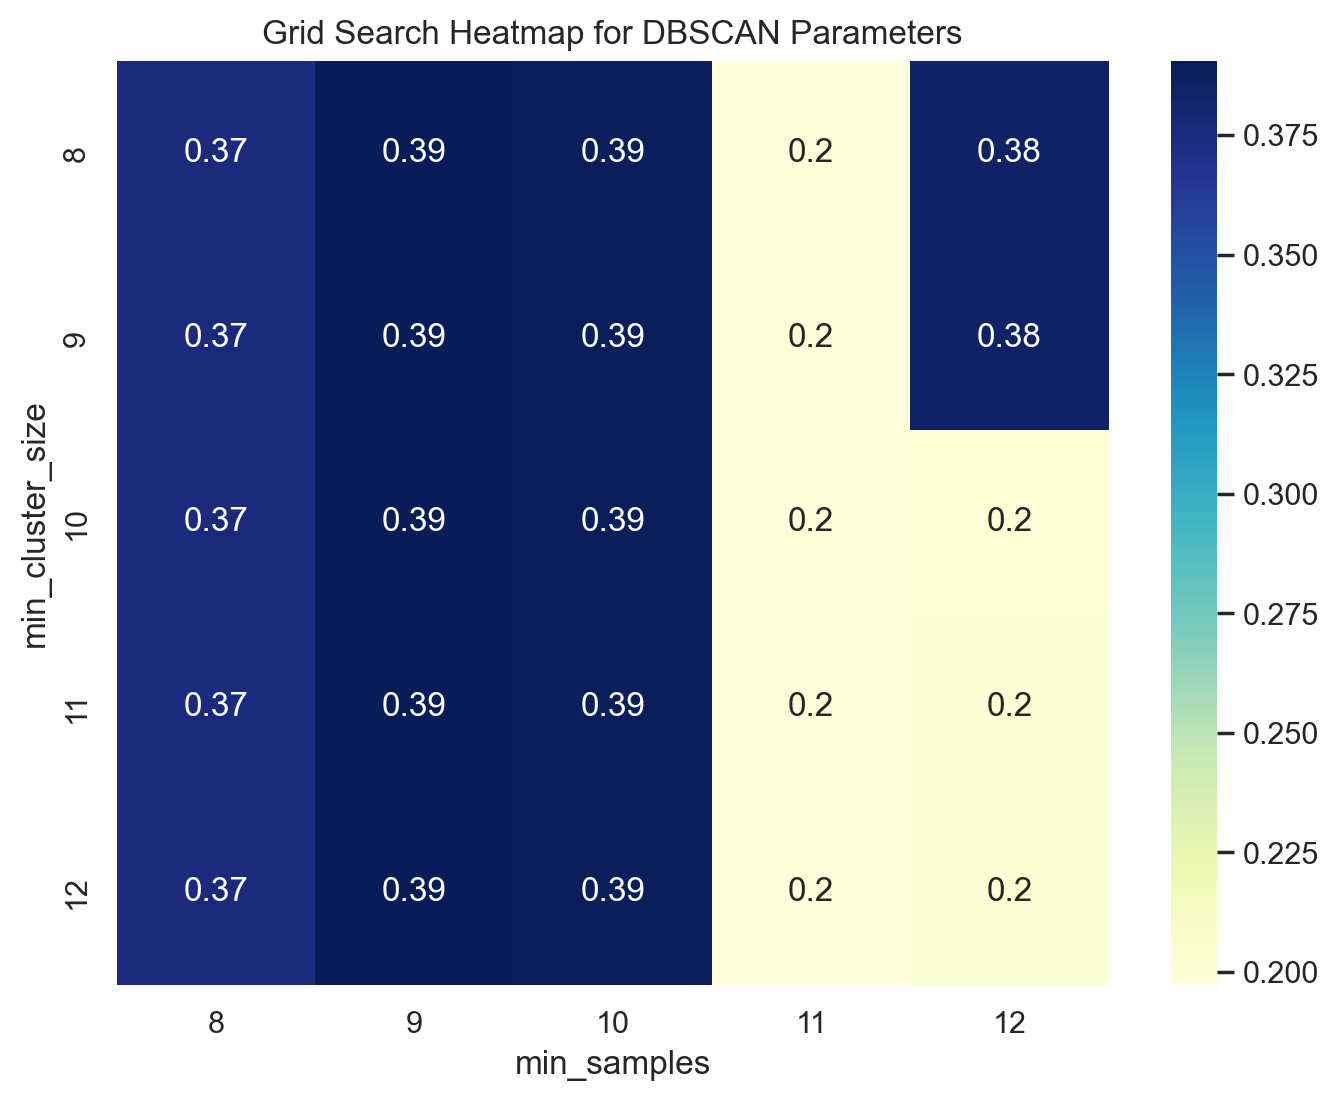

In [31]:
# decide parameters using gridsearch
# Define parameter grid
param_grid = {'min_cluster_size': [8,9,10,11,12],
              'min_samples': [8,9,10,11,12]}

# Initialize arrays to store silhouette scores
silhouette_scores = np.zeros((len(param_grid['min_cluster_size']), len(param_grid['min_samples'])))

# Iterate over parameter combinations
for i, params in enumerate(ParameterGrid(param_grid)):
    # Fit DBSCAN with current parameter combination
    hdbscan = HDBSCAN(**params)
    hdbscan.fit(X)
    labels = hdbscan.fit_predict(X)
    n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    min_cluster_size_value = params['min_cluster_size']
    min_samples_value = params['min_samples']
    
    print(f"min cluster size: {min_cluster_size_value}, min_samples: {min_samples_value}")
    print (f'number of cluster : {n_clusters_}')
    print (f'number of noise : {n_noise_}') 
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(X, hdbscan.labels_)
    silhouette_scores[i // len(param_grid['min_samples']), i % len(param_grid['min_samples'])] = silhouette_avg

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(silhouette_scores, annot=True, cmap="YlGnBu", xticklabels=param_grid['min_samples'], yticklabels=param_grid['min_cluster_size'])
plt.xlabel('min_samples')
plt.ylabel('min_cluster_size')
plt.title('Grid Search Heatmap for DBSCAN Parameters')
plt.show()

### Generate clusters

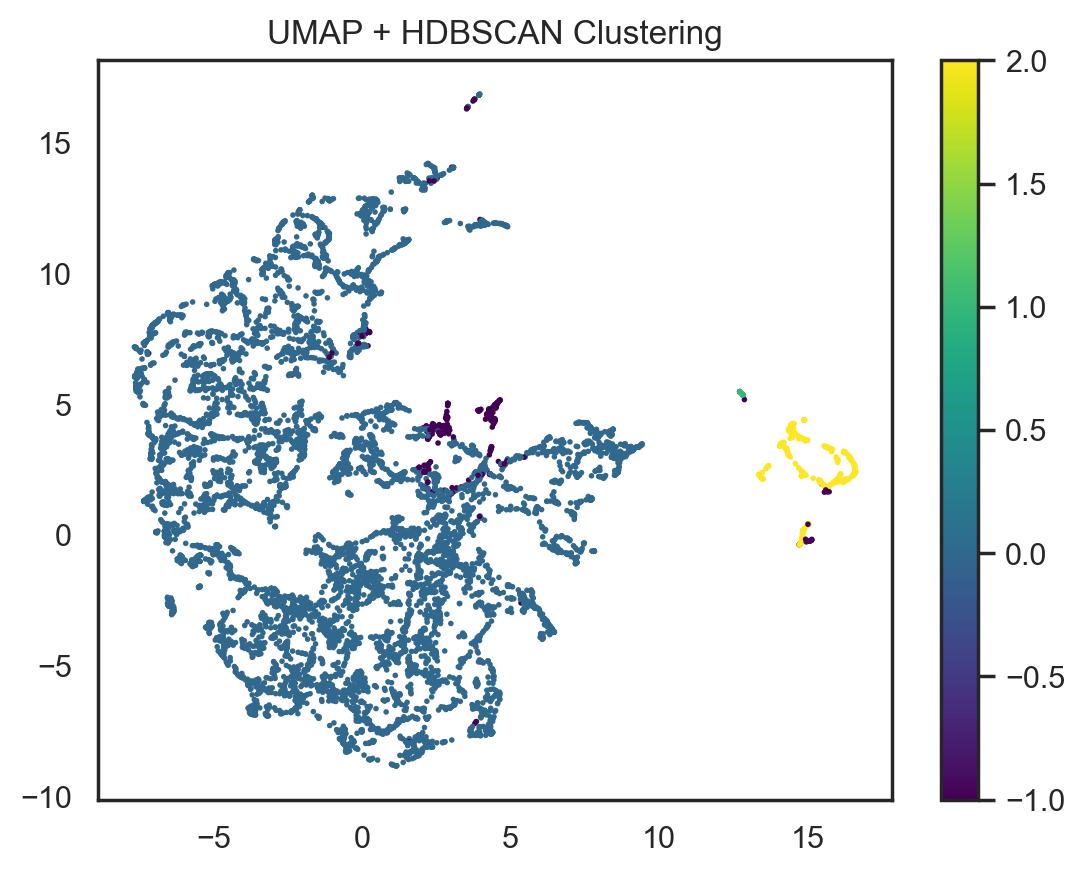

In [32]:
# try min_cluster_size 8, min_samples 9
# should generate 3 clusters with silhouette score 0.39 and noise 287
hdbscan = HDBSCAN(min_cluster_size=8, min_samples=9)
cluster_labels_hdbscan = hdbscan.fit_predict(X)
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=cluster_labels_hdbscan, cmap='viridis', s = 1)
plt.title('UMAP + HDBSCAN Clustering')
plt.colorbar()
plt.show()

### Evaluate clusters

In [33]:
# add column to housing_df_revised with gmm cluster label for each point
housing_df_revised['hdbscan clusters'] = cluster_labels_hdbscan
# run groupby function by 'gmm clusters' to see mean of each cluster
housing_df_revised.groupby('hdbscan clusters').mean()

C:\Users\krist\AppData\Local\Temp\ipykernel_40952\2756902532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_revised['hdbscan clusters'] = cluster_labels_hdbscan


,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,ListedPrice,difference_listed_vs_estimate,distance_to_maj_city_miles,violent_crime,prop_crime,larceny,vehicle_theft,x_house_coord,y_house_coord,gmm clusters,kmeans clusters,dbscan clusters
hdbscan clusters,,,,,,,,,,,,,,,,,,,
-1,4.404181,4.344948,4689.944251,588.590378,14.034265,2.637730e+06,10333.707317,2.822069e+06,184339.184669,225.677020,0.004560,0.029537,0.022522,0.002466,41.600243,-103.996676,0.153310,1.006969,-1.000000
0,3.440879,2.393934,2047.447593,199.684504,0.718542,3.914656e+05,2293.972573,3.950461e+05,3580.546489,89.208348,0.004154,0.026951,0.020247,0.002409,39.004979,-94.353994,1.828383,0.697621,-0.015477
1,3.500000,2.550000,1892.100000,300.354343,0.321249,5.371600e+05,2371.300000,5.504849e+05,13324.950000,817.710647,0.007589,0.044119,0.036167,0.002784,57.310659,-133.540933,1.000000,2.000000,-1.000000
2,3.224242,2.339394,1983.403030,223.155224,1.052137,4.214821e+05,2596.748485,4.283807e+05,6898.572727,1461.546007,0.007702,0.042590,0.032126,0.004316,62.217731,-149.285373,1.000000,2.000000,0.903030


In [34]:
# check how many points are in each cluster
for i in housing_df_revised['hdbscan clusters'].unique():
    shape = housing_df_revised[housing_df_revised['hdbscan clusters'] == i].shape[0]
    print (f'Cluster {i} has {shape} observations')

Cluster 0 has 8787 observations
Cluster 2 has 330 observations
Cluster -1 has 287 observations
Cluster 1 has 20 observations


# Comparisons acorss all clustering methods

- GMM
    - silhouette scores seem to be relatively consistent when we run the GMM multiple times
    - elbow point however fluctuates significantly when we run the elbow point graph multiple times
        - this may be a result of a different initialization point every time
    - In GMM we used 3 clusters where it had a silhouette score of 0.20, meanwhile the elbow point indicated that we should have used 4 clusters
    - the umap visualiztion seemed very homogenous between 2 clusters, however there was a clear separation with the third cluster. Note since the GMM was ran in 6 dimensiosn, projecting it onto a 2 dimensional umap may not be indicative of how well our clustering actually is.
    - Looking at means of each cluster, we see a clear distinction between all 3 clusters
    - however we see an exponental decrease in size of clusters as follows
        - Cluster 0: 7597 observations
        - Cluster 1: 1266 observations
        - Cluster 2: 561 observations
- K means
    - with K means we see consistency among the silhouette scores and the elbow point as both indicate that 4 clusters seems optimal. 4 clusters indicated a silhouette score of 0.319, which is better than that compared to GMM
    - when running the silhouette scores and elbow point multiple times, we get roughly the same result every time, indicating that K means may allow us to reproduce the data quite well
    - the umap visualization shows clear distinction between the 4 groups
    - Looking at the mean of each cluster, I believe that we see a much clearer distinction between clusters compared to GMM
    - however when we look at the cluster sizes, we still see this exponential decrease, but it seems a lot more gradual compared to GMM as follows:
        - Cluster 0: 2714 observations
        - Cluster 1: 6317 observations
        - Cluster 2: 377 observations
        - Cluster 3: 16 observations
    - Cluster size of 377 may be problematic, but a cluster size of 16 will definitely be problematic
    - another issue is the underlying issue in regards to kmeans, that being that we must assume spherial covariance with roughly equal variance among all clusters
    - Since we do not know the clear shape of our data, K means may not be ideal
- DBSCAN
    - DBSCAN is the best in terms of reproducibilty of clusters, as running the grid search heatmap producted the same results of same number of clusters, same number of noise points, and same silhouette score every time
    - Using DBSCAN paramters of eps = 1, and min_samples = 15, we got 4 clusters and a silhouette score of 0.45 which is the highest out of the other 3 algorithms.
    - The issue with DBSCAN however lies in how it generates noise points that does not cluster with the other points. Using the above paramters, we have generated 619 noise points which is around 6.6% of our data.
    - Looking at the umap visualization however, we do not see clear separation of clusters, however since we are projecting clustering from 6 dimensions down to 2 dimensions, our visualization may not be very indicative of how well our clustering actually is.
    - Looking at the mean of each cluster we see a distinguishable relationship between clusters
    - however there is one major issue that will rule us out of using DBSCAN, that being that it classifies the expensive houses as noise instead of clusters
    - looking at cluster sizes, we see this exponential decrease in size, more drastic that that of GMM as follows:
        - Cluster 0: 8447 observations
        - Cluster 1: 314 observations
        - Cluster 2: 16 observations
        - Cluster 3: 28 observations
    - Cluster 1 may be problematic based on its size, but cluster 2 and 3 most definitely will cause issues as it is too small
    
- HDBSCAN
    - HDBSCAN is quite similar to that of DBSCAN however with our hyperparameters we were able to reduce the noise points by more than half and still maintain a fairly good silhousette score. 
    - Using parameters min_clusters_size = 8, and min_samples = 9, we generated 3 clusters with 287 noise points and a silhouette score of 0.39, which is higher compared to GMM and K-means
    - however it still has the same issues as DBSCAN, that be classifying expensive homes as outliers
    - the cluster sizes are as follows:
        - Cluster 0: 8787 observations
        - Cluster 1: 20 observations
        - Cluster 2: 330 observations
    - Cluster 1 has too little obervations and may not generalize well when using the training and testing set

### Conclusions
It seems that we will likely use pca reduced k means in order to train the model. It seems that 4 clusters seems to be better for classificaiton compared to the 3 used in both GMM and Kmeans. Kmeans has the most clear distinction between cluster out of all 3. In terms of silhouette scores, Kmeans is very similar to that of GMM, but because of the issue of noise, that being that DBSCAN classifies the expensive houses as noise, we will have to rule it out as we would like to include expensive homes as its own cluster, even though DBSCAN has significantly the best silhouette score. Another point is that K means has the least exponential decrease in cluster size. However the fact that one of the clusters was of size 17, may pose an issue when splitting up the data into our training and testing model. We would also like to try HDBSCAN to see how it compares to kmeans, not only by silhouette score, but also how each algorithm distingiusies between clusters.
    